<a href="https://colab.research.google.com/github/rl-cyber/User-Engaged-Network-Diagnosis/blob/main/Spec_to_CVE_Matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================================================
# Matching 3GPP Spec Inconsistencies to CVEs
# ============================================================

# Install required packages
!pip install -q sentence-transformers

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
import torch


# Upload and load files
conflict_path = "/content/conflict_segments_gpt_enhanced.xlsx"
cve_path = "/content/cve_dataset_with_inferred_symptoms.csv"

conflict_df = pd.read_excel(conflict_path)
cve_df = pd.read_csv(cve_path)


# For spec conflicts: concatenate conflict_explanation + effect_gpt
conflict_texts = (
    conflict_df['conflict_explanation'].fillna('') + ". Effect: " + conflict_df['effect_gpt'].fillna('')
).tolist()

# For CVEs: concatenate description + inferred symptoms
cve_texts = (
    cve_df['detailed_description'].fillna('') + ". Symptoms: " + cve_df['inferred_user_symptoms'].fillna('')
).tolist()


# Load sentence transformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Compute embeddings
conflict_embeddings = model.encode(conflict_texts, convert_to_tensor=True, batch_size=32)
cve_embeddings = model.encode(cve_texts, convert_to_tensor=True, batch_size=32)


# For each spec conflict, find the top matching CVEs
results = []

for idx, conflict_emb in enumerate(conflict_embeddings):
    # Compute similarity to all CVEs
    similarities = util.cos_sim(conflict_emb, cve_embeddings)[0]

    # Get top-k matches
    top_k = torch.topk(similarities, k=5)

    for score, cve_idx in zip(top_k.values, top_k.indices):
      cve_idx = int(cve_idx)
      result = {
        'conflict_id': conflict_df.iloc[idx]['conflict_id'],
        'cve_id': cve_df.iloc[cve_idx]['cve_id'],
        'similarity_score': score.item(),
        'conflict_explanation': conflict_df.iloc[idx]['conflict_explanation'],
        'cve_description': cve_df.iloc[cve_idx]['detailed_description'],
        'conflict_effect': conflict_df.iloc[idx]['effect_gpt'],
        'cve_effect': cve_df.iloc[cve_idx]['inferred_user_symptoms']
    }
    results.append(result)



matches_df = pd.DataFrame(results)
output_path = "/content/spec_to_cve_matches.csv"
matches_df.to_csv(output_path, index=False)

print(f"Matching complete. Results saved to {output_path}")

# Display preview
matches_df.head(10)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Matching complete. Results saved to /content/spec_to_cve_matches.csv


,conflict_id,cve_id,similarity_score,conflict_explanation,cve_description,conflict_effect,cve_effect
0,C001,CVE-2025-20647,0.424409,The non-access stratum (NAS) described in the ...,"In Modem, there is a possible system crash due...",Ensures secure and continuous IP connectivity ...,"Slow mobile internet, Call setup failures, Del..."
1,C002,CVE-2021-25477,0.413754,"During the EPS attach procedure, the network c...",An improper error handling in Mediatek RRC Pro...,NaN,"Slow mobile internet, Call setup failures, Del..."
2,C003,CVE-2025-20647,0.380162,A UE configured for NAS signalling low priorit...,"In Modem, there is a possible system crash due...",Indicates priority level for congestion contro...,"Slow mobile internet, Call setup failures, Del..."
3,C004,CVE-2024-20149,0.425849,A UE attached for EPS services shall operate i...,"In Modem, there is a possible system crash due...",Potential issues with IMS voice availability a...,"Slow mobile internet, Call setup failures, Del..."
4,C005,CVE-2024-38426,0.436499,The UE mode of operation can change as a resul...,While processing the authentication message in...,Transition to PS mode 1 or PS mode 2,Unknown
5,C006,CVE-2025-20647,0.492964,"Whenever the UE 's usage setting changes, the ...","In Modem, there is a possible system crash due...",E-UTRA capability may be disabled or re-enable...,"Slow mobile internet, Call setup failures, Del..."
6,C007,CVE-2024-20154,0.419823,Whenever the voice domain preference for E-UTR...,"In Modem, there is a possible out of bounds wr...",Mode transition and capability adjustment base...,"Unexpected pop-ups or spyware symptoms, Data l..."
7,C008,CVE-2024-20149,0.478779,Whenever the UE 's availability for voice call...,"In Modem, there is a possible system crash due...",Transit to CS/PS mode 1 or Disable E-UTRA capa...,"Slow mobile internet, Call setup failures, Del..."
8,C009,CVE-2024-20149,0.501173,Whenever the UE 's configuration on use of SMS...,"In Modem, there is a possible system crash due...",Possible transition between modes and detachme...,"Slow mobile internet, Call setup failures, Del..."
9,C010,CVE-2024-38426,0.415420,This clause describes the principles for the h...,While processing the authentication message in...,Potential lack of encryption if null ciphering...,Unknown


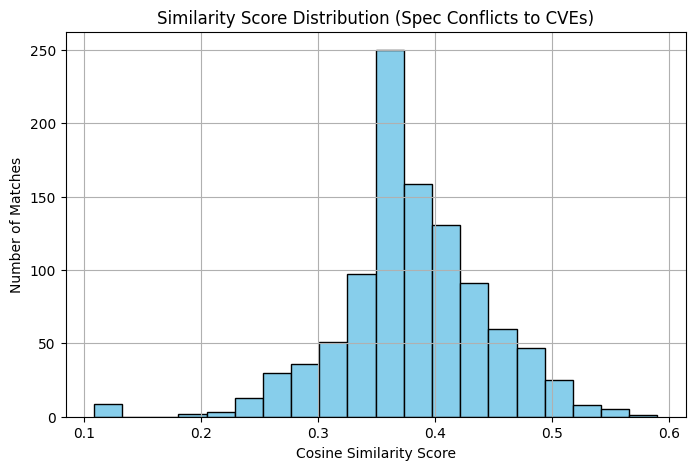

In [2]:
import matplotlib.pyplot as plt

# Plot histogram of similarity scores
plt.figure(figsize=(8,5))
plt.hist(matches_df['similarity_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Similarity Score Distribution (Spec Conflicts to CVEs)')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

In [3]:
# ============================================================
# Filter, Select Top-1, and Save Cleaned Spec-to-CVE Matches
# ============================================================

import pandas as pd

# Load the raw matching results
data_path = "/content/spec_to_cve_matches.csv"  # adjust path if needed
matches_df = pd.read_csv(data_path)


# Set a threshold
SIMILARITY_THRESHOLD = 0.5

# Filter matches
filtered_df = matches_df[matches_df['similarity_score'] >= SIMILARITY_THRESHOLD]
print(f"Remaining matches after filtering: {len(filtered_df)}")


# Sort by conflict_id and similarity_score descending
filtered_df = filtered_df.sort_values(by=["conflict_id", "similarity_score"], ascending=[True, False])

# Pick top-1 per conflict_id
top1_df = filtered_df.groupby("conflict_id").head(1).reset_index(drop=True)

print(f"Number of unique spec conflicts matched: {top1_df['conflict_id'].nunique()}")


output_path = "/content/spec_to_cve_matches_top1_filtered.csv"
top1_df.to_csv(output_path, index=False)

print(f"Cleaned Top-1 matches saved to {output_path}")

top1_df.head(10)


Remaining matches after filtering: 26
Number of unique spec conflicts matched: 26
Cleaned Top-1 matches saved to /content/spec_to_cve_matches_top1_filtered.csv


,conflict_id,cve_id,similarity_score,conflict_explanation,cve_description,conflict_effect,cve_effect
0,C009,CVE-2024-20149,0.501173,Whenever the UE 's configuration on use of SMS...,"In Modem, there is a possible system crash due...",Possible transition between modes and detachme...,"Slow mobile internet, Call setup failures, Del..."
1,C034,CVE-2025-20634,0.539002,The UE may be rejected with EMM cause #78 in A...,"In Modem, there is a possible out of bounds wr...",Restricted access to certain PLMNs via satelli...,"Unexpected pop-ups or spyware symptoms, Data l..."
2,C120,CVE-2025-20634,0.508031,This clause specifies the requirements for a U...,"In Modem, there is a possible out of bounds wr...",NaN,"Unexpected pop-ups or spyware symptoms, Data l..."
3,C121,CVE-2024-38426,0.516238,The following abnormal case can be identified ...,While processing the authentication message in...,Possible need for retransmission with new sequ...,Unknown
4,C145,CVE-2024-38426,0.505812,The following abnormal cases can be identified...,While processing the authentication message in...,Initiate tracking area updating procedure if T...,Unknown
5,C161,CVE-2024-20149,0.564665,The following abnormal cases can be identified...,"In Modem, there is a possible system crash due...",Aborted security mode control procedure with p...,"Slow mobile internet, Call setup failures, Del..."
6,C162,CVE-2023-32890,0.552525,The following abnormal cases can be identified...,"In modem EMM, there is a possible system crash...",Abort security mode control procedure due to l...,"Slow mobile internet, Call setup failures, Del..."
7,C169,CVE-2024-53027,0.514612,The following abnormal cases can be identified...,Transient DOS may occur while processing the c...,Abort any ongoing EMM procedure,Unknown
8,C185,CVE-2023-43551,0.526369,If the attach request for emergency bearer ser...,Cryptographic issue while performing attach wi...,NaN,Unknown
9,C191,CVE-2022-26446,0.540797,The following abnormal cases can be identified...,"In Modem 4G RRC, there is a possible system cr...",NaN,"Slow mobile internet, Call setup failures, Del..."


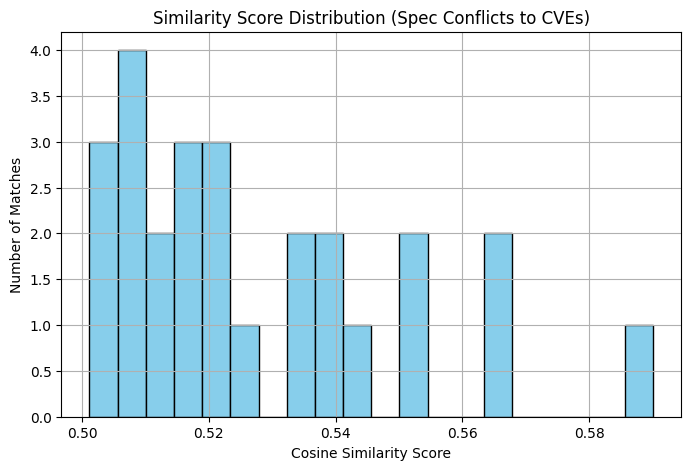

In [4]:
import matplotlib.pyplot as plt

# Plot histogram of similarity scores
plt.figure(figsize=(8,5))
plt.hist(top1_df['similarity_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Similarity Score Distribution (Spec Conflicts to CVEs)')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

In [5]:
# Matching statistics
num_conflicts = top1_df['conflict_id'].nunique()
avg_similarity = top1_df['similarity_score'].mean()
std_similarity = top1_df['similarity_score'].std()

print(f"Matched {num_conflicts} specification conflicts to CVEs.")
print(f"Average similarity score: {avg_similarity:.4f} (Std: {std_similarity:.4f})")


Matched 26 specification conflicts to CVEs.
Average similarity score: 0.5275 (Std: 0.0229)


In [6]:
# ============================================================
# LLM-Assisted Validation of Spec-to-CVE Matches
# ============================================================

!pip install -q openai
import pandas as pd
import openai
import time

# Set your OpenAI API key
openai.api_key = "XXXXX"  # Replace with your actual key

# Load Top-1 filtered matches
data_path = "/content/spec_to_cve_matches_top1_filtered.csv"
matches_df = pd.read_csv(data_path)

# ---------------------- Define GPT Prompt Function ----------------------

def build_validation_prompt(row):
    return f"""
You are a cellular security analyst.

Given the following information:
- Spec Inconsistency Explanation: {row['conflict_effect']}
- Matched CVE Description: {row['cve_description']}
- Inferred User Symptoms: {row['cve_effect']}

Task:
1. Is there a plausible causal link between the spec inconsistency and the CVE? (Answer only YES or NO)
2. Are the expected user symptoms aligned with the CVE description? (Answer only ALIGNED or NOT ALIGNED)
3. Give your confidence in the mapping (number between 0 and 10).
4. Briefly explain your reasoning (1 sentences).
"""

def gpt_validate(row):
    try:
        prompt = build_validation_prompt(row)
        response = openai.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.1,
            max_tokens=200
        )
        content = response.choices[0].message.content
        return content
    except Exception as e:
        print("Error:", e)
        return "GPT_ERROR"

validation_outputs = []

for idx, row in matches_df.iterrows():
    print(f"Processing {row['conflict_id']} ↔ {row['cve_id']}...")
    output = gpt_validate(row)
    validation_outputs.append(output)
    time.sleep(1.2)  # to avoid hitting rate limits

matches_df['gpt_validation_output'] = validation_outputs


output_path = "/content/spec_to_cve_matches_validated_gpt.csv"
matches_df.to_csv(output_path, index=False)

print(f"GPT-assisted validation complete. Results saved to {output_path}")



Processing C009 ↔ CVE-2024-20149...
Processing C034 ↔ CVE-2025-20634...
Processing C120 ↔ CVE-2025-20634...
Processing C121 ↔ CVE-2024-38426...
Processing C145 ↔ CVE-2024-38426...
Processing C161 ↔ CVE-2024-20149...
Processing C162 ↔ CVE-2023-32890...
Processing C169 ↔ CVE-2024-53027...
Processing C185 ↔ CVE-2023-43551...
Processing C191 ↔ CVE-2022-26446...
Processing C209 ↔ CVE-2023-43551...
Processing C210 ↔ CVE-2022-26446...
Processing C215 ↔ CVE-2025-20644...
Processing C231 ↔ CVE-2023-20827...
Processing C253 ↔ CVE-2025-20647...
Processing C255 ↔ CVE-2023-32843...
Processing C258 ↔ CVE-2024-20077...
Processing C259 ↔ CVE-2022-26446...
Processing C260 ↔ CVE-2022-26446...
Processing C271 ↔ CVE-2023-43551...
Processing C277 ↔ CVE-2023-37368...
Processing C283 ↔ CVE-2023-32890...
Processing C351 ↔ CVE-2024-20149...
Processing C401 ↔ CVE-2025-20647...
Processing C441 ↔ CVE-2024-23353...
Processing C978 ↔ CVE-2023-32846...
GPT-assisted validation complete. Results saved to /content/spec

In [7]:
# ============================================================
# Post-Process GPT Validation Outputs and Summarize
# ============================================================

import pandas as pd
import re

# Load the validated matches
data_path = "/content/spec_to_cve_matches_validated_gpt.csv"
matches_df = pd.read_csv(data_path)


def extract_field(pattern, text):
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        return match.group(1).strip()
    else:
        return "UNKNOWN"

def parse_gpt_output(text):
    causal_link = extract_field(r"1\.\s*.*?\b(YES|NO)\b", text)
    symptom_alignment = extract_field(r"2\.\s*.*?\b(ALIGNED|NOT ALIGNED)\b", text)
    confidence = extract_field(r"3\.\s*.*?(\d{1,3})", text)
    reasoning = extract_field(r"4\.\s*(.+)", text)
    return causal_link, symptom_alignment, confidence, reasoning

# Apply parsing
causal_links, symptom_alignments, confidence_scores, reasonings = [], [], [], []

for output in matches_df['gpt_validation_output']:
    causal_link, symptom_alignment, confidence, reasoning = parse_gpt_output(output)
    causal_links.append(causal_link)
    symptom_alignments.append(symptom_alignment)
    confidence_scores.append(confidence)
    reasonings.append(reasoning)

matches_df['causal_link_gpt'] = causal_links
matches_df['symptom_alignment_gpt'] = symptom_alignments
matches_df['confidence_score_gpt'] = confidence_scores
matches_df['reasoning_gpt'] = reasonings


output_path = "/content/spec_to_cve_matches_validated_parsed.csv"
matches_df.to_csv(output_path, index=False)
print(f"Parsed validation results saved to {output_path}")


# Convert confidence scores to numeric
matches_df['confidence_score_gpt'] = pd.to_numeric(matches_df['confidence_score_gpt'], errors='coerce')

# Calculate stats
num_matches = len(matches_df)
causal_yes = (matches_df['causal_link_gpt'] == 'YES').sum()
symptom_aligned = (matches_df['symptom_alignment_gpt'] == 'ALIGNED').sum()
avg_confidence = matches_df['confidence_score_gpt'].mean()

print("\n Validation Summary:")
print(f"- Total Matches Validated: {num_matches}")
print(f"- Causal Links Found: {causal_yes} ({causal_yes/num_matches*100:.2f}%)")
print(f"- Symptom Alignment: {symptom_aligned} ({symptom_aligned/num_matches*100:.2f}%)")
print(f"- Average Confidence Score: {avg_confidence:.2f}")

Parsed validation results saved to /content/spec_to_cve_matches_validated_parsed.csv

 Validation Summary:
- Total Matches Validated: 26
- Causal Links Found: 17 (65.38%)
- Symptom Alignment: 21 (80.77%)
- Average Confidence Score: 7.81


In [8]:
filtered_matches = matches_df[
    (matches_df['causal_link_gpt'] == 'YES') &
    (matches_df['confidence_score_gpt'] >= 7)
]
filtered_matches.to_csv("/content/spec_to_cve_final_high_confidence.csv", index=False)
print(f"Final high-confidence matches: {len(filtered_matches)}")


Final high-confidence matches: 17


In [9]:
avg_similarity = filtered_matches['similarity_score'].mean()
avg_confidence = filtered_matches['confidence_score_gpt'].mean()

print(f"Average similarity of validated matches: {avg_similarity:.2f}")
print(f"Average GPT confidence: {avg_confidence:.2f}")
print(f"Number of validated matches: {len(filtered_matches)}")


Average similarity of validated matches: 0.53
Average GPT confidence: 7.82
Number of validated matches: 17


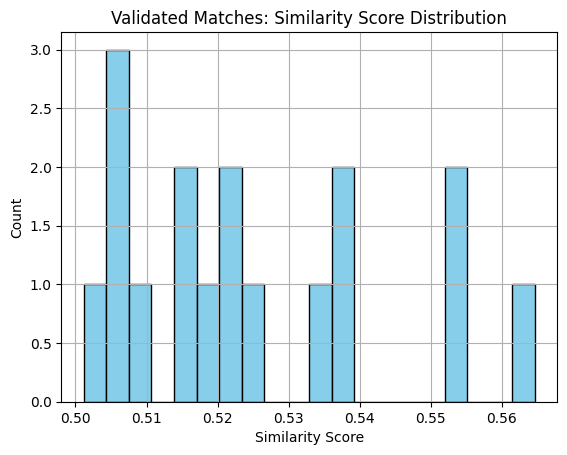

In [10]:
import matplotlib.pyplot as plt

# Similarity
plt.hist(filtered_matches['similarity_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Validated Matches: Similarity Score Distribution')
plt.xlabel('Similarity Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()
